In [1]:
import os
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [2]:
def format_percentage(percentage):
    """Formats percentage with two decimal points"""
    return f"{percentage * 100:.1f}"

In [3]:
def is_correct(ground_truth, final_output):
    correct = True
    for i in range(len(final_output)):
        for j in range(len(final_output[0])):
            try: 
                if final_output[i][j] != ground_truth[i][j]:
                    correct = False
            except: 
                correct = False
    return correct

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Use a nice Seaborn style
sns.set(style="whitegrid")

def plot_success_matrix(success_matrix, task_names):
    # Transpose the success_matrix
    success_matrix = success_matrix.T
    labelsize=30
    # Create a larger figure
    plt.figure(figsize=(20, 10))

    # Create a custom color map with light black for 'Wrong' and pleasant green for 'Correct'
    cmap = ListedColormap(['#808080', '#99c199'])

    # Use Seaborn to create a heatmap. Use the custom color map (vmin and vmax are set for centering colors around a pivot)
    ax = sns.heatmap(success_matrix, cmap=cmap, linewidths=.5, vmin=0, vmax=1, cbar_kws={"ticks":[0,1]})

    # Set labels
    ax.set_xlabel('Task Name', fontsize=labelsize)
    ax.set_ylabel('Run Index', fontsize=labelsize)

    # Configure ticks
    # Use task names for x-ticks
    ax.set_xticks(np.arange(len(task_names)))
    ax.set_xticklabels(task_names, rotation=45, fontsize=labelsize, ha='right')  # rotate labels and align right for better readability
    ax.set_yticks(np.arange(success_matrix.shape[0]))
    ax.set_yticklabels(np.arange(1, success_matrix.shape[0] + 1), fontsize=labelsize)

    # Set colorbar labels
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([0.25, 0.75])
    colorbar.set_ticklabels(['Wrong', 'Correct'])
    colorbar.ax.tick_params(labelsize=labelsize)
    

    # Show the plot
    plt.tight_layout()
    plt.savefig('plot.png', dpi=300)


ANALYZED 57 TASKS
CORRECT 12 TASKS
ACCURACY: 0.21052631578947367
DIMENSION ACCURACY: 0.8596491228070176
CELL ACCURACY: 0.7570914902117459
86.0 & 75.7 & 12 & 21.1 \\
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0.]
 [0. 0.

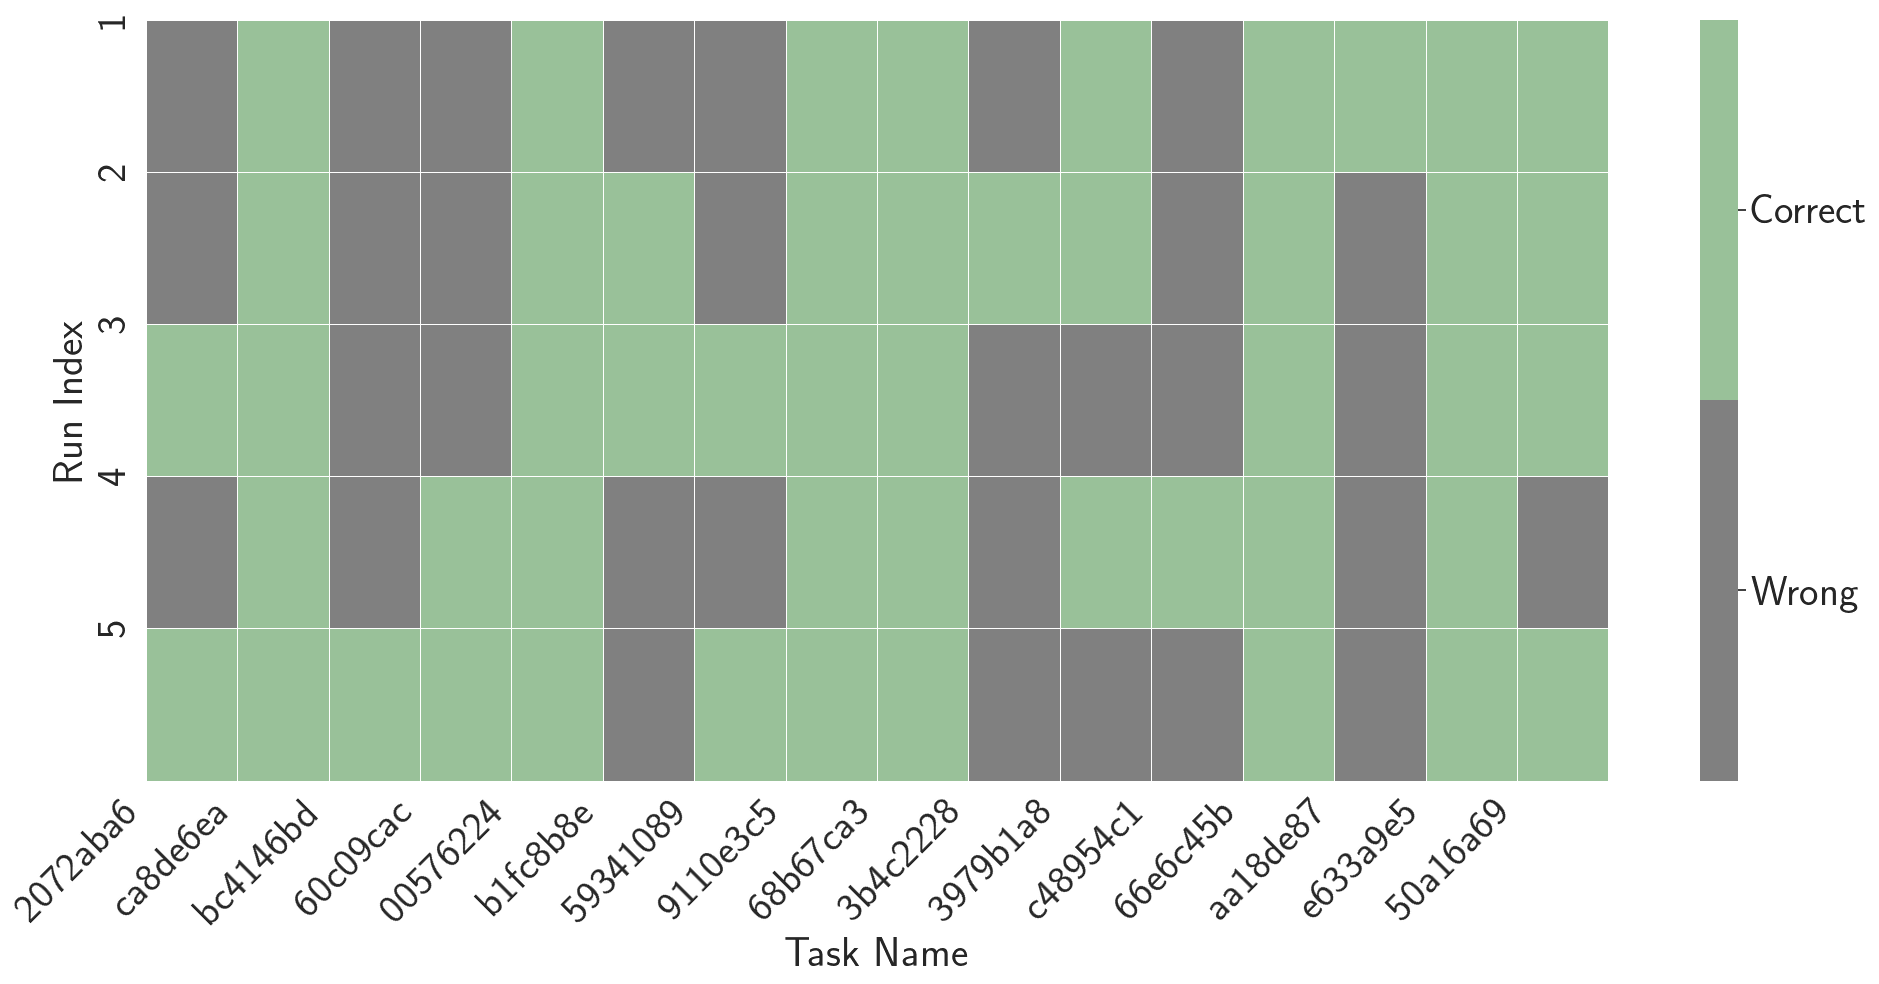

In [58]:
def evaluate_model_performance():
    folder = "results/evaluation_small/no_replace_comma/gpt-3.5-turbo-16k_top_p_1"
    folder = "results/evaluation_small/no_replace_comma/gpt-4"


    result_files = os.listdir(folder)
    result_files = [os.path.join(folder, file) for file in result_files if os.path.splitext(file)[1] == ".json"]
    accuracies = []
    task_names = []
    
    # We assume there are 5 runs
    num_runs = 5
    num_tasks = len(result_files)
    success_matrix = np.zeros((num_tasks, num_runs))

    correct_dimensions, correct_predictions, correct_cells, total_predictions, total_cells, all_correct = 0, 0, 0, 0, 0, []
    for file_idx, result_file in enumerate(result_files):

        task_name = result_file.split("/")[-1].split("_out")[0]
        true_task_path = os.path.join("data/evaluation_small/", task_name + ".json")
        task_names.append(task_name)

        ground_truth = None 

        with open(true_task_path, "r") as f:
            obj = json.loads(f.read())
            ground_truth = obj["test"][0]["output"]

        with open(result_file, "r") as f:
            results = json.loads(f.read())["output"]

            considered_results = []
            dimensions = []
            #results = [results[0]]
            # for each result filter that all row dimensions are the same
            for run_idx in range(num_runs):
                result = results[run_idx]
                try:
                    result =  ast.literal_eval(result)
                except:
                    continue
                d1 = len(result)
                if not isinstance(result[0], list): 
                    continue

                d2 = len(result[0])
                invalid = False 

                for row in result: 

                    if len(row) != d2: 
                        invalid = True 

                if not invalid: 
                    considered_results.append(result)
                    dimensions.append((d1, d2))


            # perform majority voting on the number of dimensions
            majority_dimension = max(dimensions,key=dimensions.count)
            # filter to lists with majority dimension
            considered_results = [result for result in considered_results if len(result) == majority_dimension[0] and len(result[0]) == majority_dimension[1]]
            final_output = considered_results[0]
            # majority voting on final output -> we perform character by character voting
            for i in range(len(final_output)):
                for j in range(len(final_output[0])):

                    char_counter = []
                    for elm_list in considered_results:
                        char_counter.append(elm_list[i][j])

                    max_character =  max(char_counter,key=char_counter.count)
                    final_output[i][j] = max_character

            
            if len(final_output) == len(ground_truth) and all(
                        len(pred_row) == len(gt_row) for pred_row, gt_row in zip(final_output, ground_truth)):
                    correct_dimensions += 1
                    for pred_row, gt_row in zip(final_output, ground_truth):
                        for pred_cell, gt_cell in zip(pred_row, gt_row):
                            total_cells += 1
                            if pred_cell == gt_cell:
                                correct_cells += 1
                                
            correct = True
            for i in range(len(final_output)):
                for j in range(len(final_output[0])):
                    try: 
                        if final_output[i][j] != ground_truth[i][j]:
                            correct = False
                    except: 
                        correct = False
                    
            total_predictions += 1
            if correct: 
                correct_predictions += 1
                
                accuracies.append(1)
            else: 
                accuracies.append(0)
                
            for idx in range(num_runs):
                res_correct = False
                current_pred = results[idx]
                try:
                    current_pred =  ast.literal_eval(current_pred)
                except:
                    res_correct = False
                if len(current_pred) == len(ground_truth) and all(
                        len(pred_row) == len(gt_row) for pred_row, gt_row in zip(current_pred, ground_truth)):
                    res_correct = True
                    for i in range(len(current_pred)):
                        for j in range(len(current_pred[0])):
                            try: 
                                if current_pred[i][j] != ground_truth[i][j]:
                                    res_correct = False
                            except: 
                                res_correct = False
                    #print("res correc ", res_correct)
                    #print("gt ", ground_truth)
                    if res_correct:
                        success_matrix[file_idx, idx] = int(res_correct) 
                    
    return correct_dimensions, correct_predictions, correct_cells, total_predictions, total_cells, all_correct, success_matrix, task_names, accuracies

dim_correct, acc_correct, c_acc_correct, total, c_acc_total, all_correct, success_matrix, task_names, accuracies = evaluate_model_performance()
cell_accuracy = c_acc_correct/c_acc_total
total_accuracy = acc_correct/total
dim_accuracy = dim_correct/total

print(f"ANALYZED {total} TASKS")
print(f"CORRECT {acc_correct} TASKS")
print(f"ACCURACY: {total_accuracy}")
print(f"DIMENSION ACCURACY: {dim_accuracy}")
print(f"CELL ACCURACY: {cell_accuracy}")
print(f"{format_percentage(dim_accuracy)} & {format_percentage(cell_accuracy)} & {acc_correct} & {format_percentage(total_accuracy)} \\\\")

print(success_matrix)

# Filter task names that have at least one correct classification
filtered_task_names = [name for idx, name in enumerate(task_names) if success_matrix[idx].any()]
#filtered_task_names = [name for idx, name in enumerate(task_names) if accuracies[idx]]

print(filtered_task_names)
# Filter success_matrix for tasks with at least one correct classification
filtered_success_matrix = success_matrix[[idx for idx, _ in enumerate(task_names) if success_matrix[idx].any()]]

# Plot the matrix
plot_success_matrix(filtered_success_matrix, filtered_task_names)
#plot_success_matrix(success_matrix, task_names)